In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
label=df['label']


In [5]:
df_new=df.drop(['label',], axis=1)

In [6]:
df_new.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
img=np.array(df.iloc[50,1:]).reshape(28,28)

7

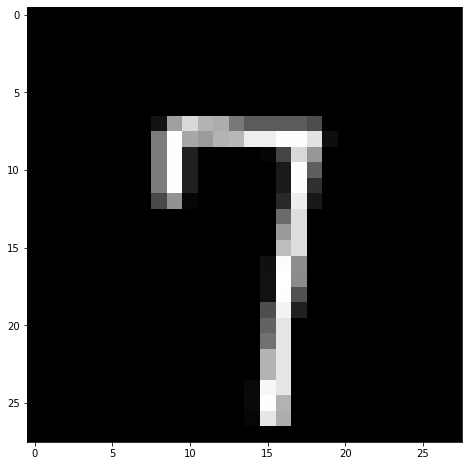

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(img,interpolation=None,cmap='gray')
label[50]

In [11]:
labels=label.head(30000)
data=df_new.head(30000)

### Data preprocessing

In [15]:
stnd_data=preprocessing.scale(data)

In [65]:
temp=stnd_data
cov_mat=np.matmul(temp.T,temp)
cov_mat.shape


(784, 784)

### Finding eigen vectors

In [70]:
from scipy.linalg import eigh
eig_val,eig_vec=eigh(cov_mat,eigvals=(782,783))

In [76]:
eig_vec=eig_vec.T
print(stnd_data.shape,eig_vec.shape)

(15000, 784) (2, 784)


### Computing final data matrix

In [82]:
new_data=np.matmul(eig_vec,temp.T)
new_data.shape

(2, 15000)

In [85]:
final_data=np.column_stack((new_data.T,labels))

In [86]:
final_data.shape

(15000, 3)

In [89]:
df=pd.DataFrame(final_data,columns=('1st principle comp','2nd principle comp','label'))

In [92]:
df.head(10)

,1st principle comp,2nd principle comp,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0
5,-0.557059,1.201279,0.0
6,6.440129,-6.118906,7.0
7,4.421476,0.215520,3.0
8,-1.315634,-0.724664,5.0
9,-2.603522,3.106035,3.0


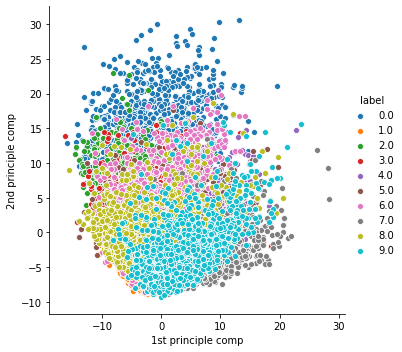

In [100]:
g = sns.FacetGrid(df, hue="label",height=5)
g.map(sns.scatterplot,'1st principle comp','2nd principle comp').add_legend()

## PCA using Scikit-Learn

In [101]:
from sklearn.decomposition import PCA

In [111]:
pca_data = PCA(n_components=2)
PCA=pca_data.fit_transform(stnd_data)

In [112]:
PCA.shape

(15000, 2)

In [114]:
plotting=np.column_stack((PCA,labels))

In [116]:
plot_df=pd.DataFrame(plotting,columns=('1st principle comp','2nd principle comp','label'))

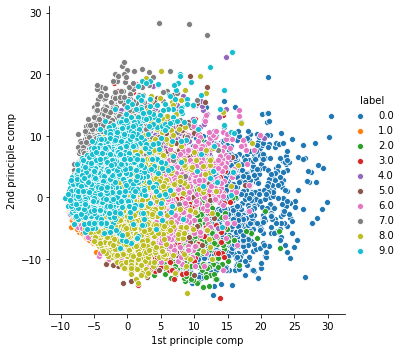

In [117]:
g = sns.FacetGrid(plot_df, hue="label",height=5)
g.map(sns.scatterplot,'1st principle comp','2nd principle comp').add_legend()